In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


*Dataset Contents*<br>

* **Town/City**: Name of the town or city.<br>
* **Country**: The country (all entries are from India).
* **Users**: Total number of users.
* **New users**: Number of new users.
* **Engaged sessions**: Total number of engaged sessions.
* **Engagement rate**: The engagement rate.
* **Engaged sessions per user**: Average number of engaged sessions per user.
* **Average engagement time**: Average time users are engaged.
* **Event** count: Total count of events.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Demographics/user-demographics.csv')
data.head()

,Town/City,Country,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count
0,Hyderabad,India,75090,71123,81835,0.560468,1.089826,132.499694,758313
1,Bengaluru,India,74325,72162,84798,0.536459,1.140908,138.728988,776356
2,Chennai,India,54031,51207,55398,0.576372,1.025300,120.585664,511249
3,Mumbai,India,48323,45147,43751,0.483714,0.905387,103.302547,422074
4,Pune,India,44515,41678,45887,0.531401,1.030821,119.913759,420101


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Town/City                  5000 non-null   object 
 1   Country                    5000 non-null   object 
 2   Users                      5000 non-null   int64  
 3   New users                  5000 non-null   int64  
 4   Engaged sessions           5000 non-null   int64  
 5   Engagement rate            5000 non-null   float64
 6   Engaged sessions per user  5000 non-null   float64
 7   Average engagement time    5000 non-null   float64
 8   Event count                5000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 351.7+ KB


In [ ]:
data.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Users,5000.0,258.6,2188.6,12.0,19.0,33.0,84.0,75090.0
New users,5000.0,239.2,2066.5,5.0,17.0,29.0,77.0,72162.0
Engaged sessions,5000.0,244.5,2296.9,0.0,15.0,28.0,73.0,84798.0
Engagement rate,5000.0,0.5,0.1,0.0,0.5,0.5,0.6,1.0
Engaged sessions per user,5000.0,0.9,0.4,0.0,0.7,0.8,1.0,13.3
Average engagement time,5000.0,101.3,173.5,0.0,47.2,77.4,119.4,6895.6
Event count,5000.0,2276.5,21224.3,36.0,128.0,250.0,689.2,776356.0


The number of users ranges from 12 to 75,090, with a mean of 258.60. It indicates a wide variance in user counts across different cities.<br>
The new users range from 5 to 72,162, with an average of 239.22. Similar to the total users, this shows a significant variation.<br>
Engaged sessions range from 0 to 84,798, with an average of 244.54. The zero minimum indicates some entries with no engaged sessions.<br>
The engagement rate ranges from 0 to 1, with an average of 0.52. This suggests moderate engagement overall.<br>
Engaged Sessions per User ranges from 0 to 13.29, with a mean of 0.85, showing how frequently users engage in sessions.<br>
The average engagement time ranges from 0 to 6,895.55 seconds, with a mean of 101.30 seconds. The high maximum indicates some very engaged users.<br>
Event counts range from 36 to 776,356, with an average of 2,276.55. This suggests a few cities contribute significantly to the total event count.

**Geographic Distribution**

<ipython-input-5-0c77b809e6ca>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities['Town/City'], x=top_cities['Users'], palette='viridis')


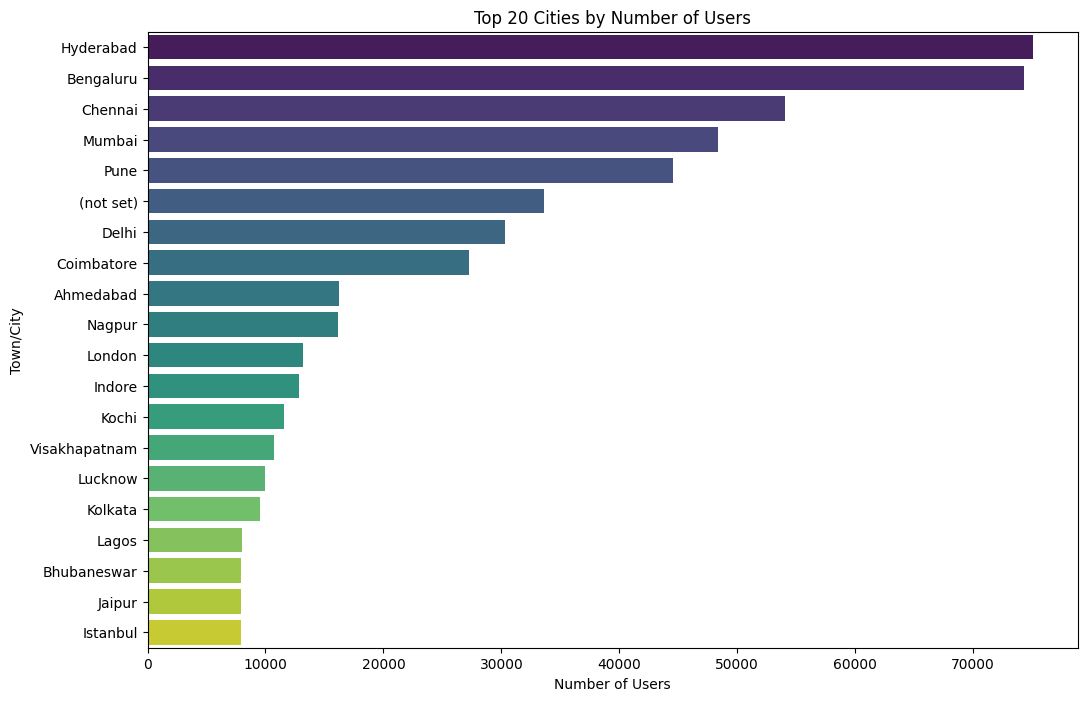

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_cities = data.sort_values(by='Users', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Users'], palette='viridis')
plt.xlabel('Number of Users')
plt.ylabel('Town/City')
plt.title('Top 20 Cities by Number of Users')
plt.show()

<ipython-input-9-08bfae13f620>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


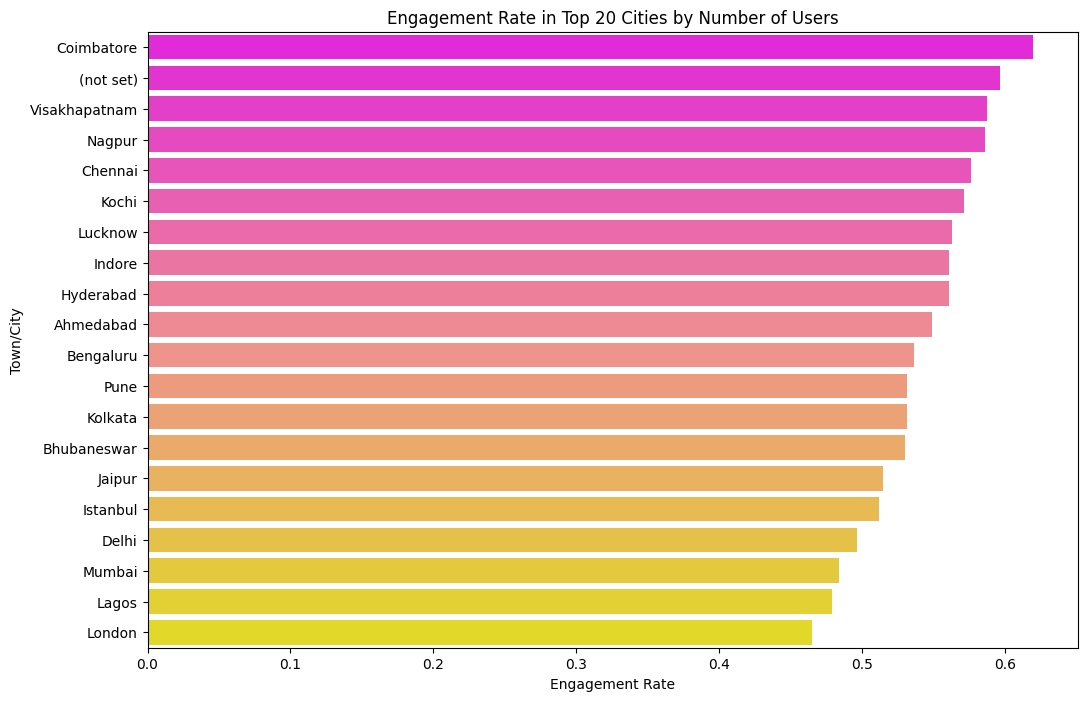

In [ ]:
plt.figure(figsize=(12, 8))
# Remove ascending argument and sort the data before plotting
sns.barplot(
    y=top_cities['Town/City'],
    x=top_cities['Engagement rate'],
    palette='spring',
    order=top_cities.sort_values('Engagement rate', ascending=False)['Town/City']
)
plt.xlabel('Engagement Rate')
plt.ylabel('Town/City')
plt.title('Engagement Rate in Top 20 Cities by Number of Users')
plt.show()

In [ ]:
import plotly.express as px

# Bubble chart
fig = px.scatter(top_cities, x='New users', y='Engagement rate', size='Users', color='Town/City',
                 hover_name='Town/City', title="Town/City Size by Users")

fig.show()

<ipython-input-11-27c85e798135>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


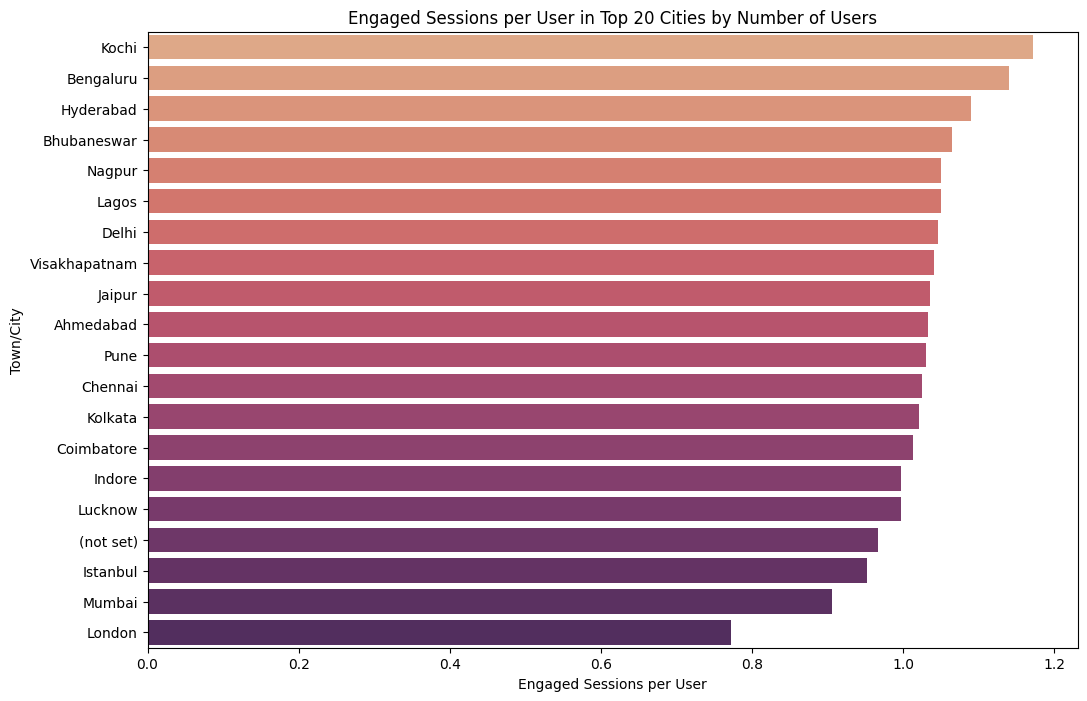

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(
    y=top_cities['Town/City'],
    x=top_cities['Engaged sessions per user'],
    palette='flare',
    order = top_cities.sort_values('Engaged sessions per user', ascending=False)['Town/City']
)
plt.xlabel('Engaged Sessions per User')
plt.ylabel('Town/City')
plt.title('Engaged Sessions per User in Top 20 Cities by Number of Users')
plt.show()

<ipython-input-13-5df0f7550305>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


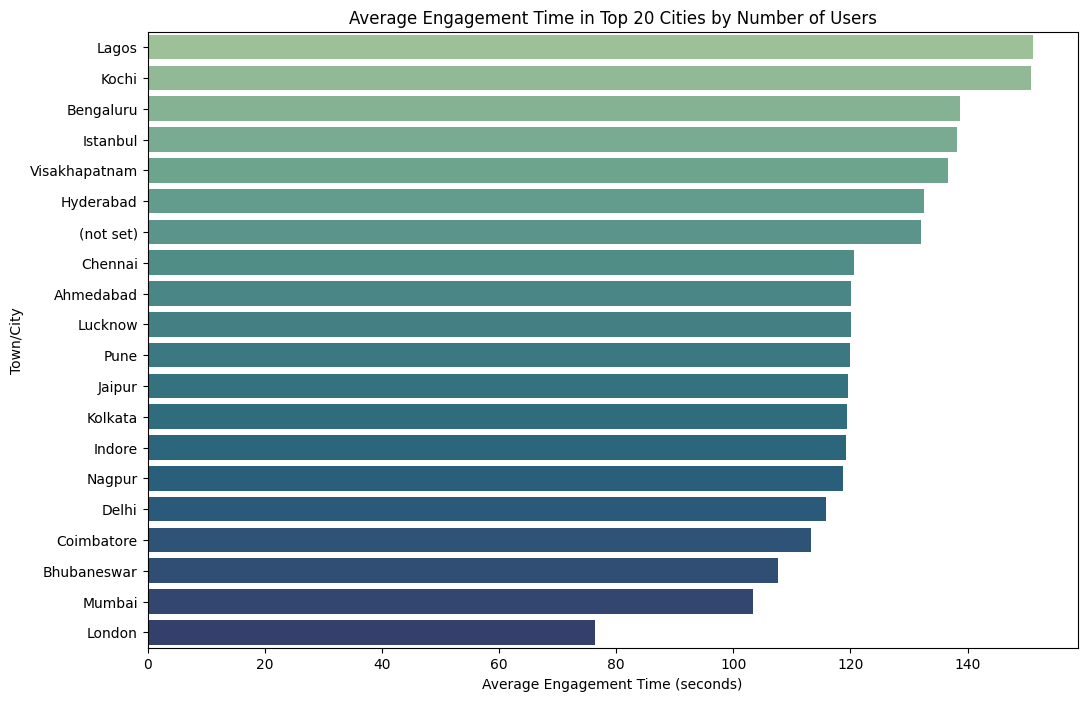

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(
    y=top_cities['Town/City'],
    x=top_cities['Average engagement time'],
    palette='crest',
    order = top_cities.sort_values('Average engagement time', ascending=False)['Town/City']
)
plt.xlabel('Average Engagement Time (seconds)')
plt.ylabel('Town/City')
plt.title('Average Engagement Time in Top 20 Cities by Number of Users')
plt.show()

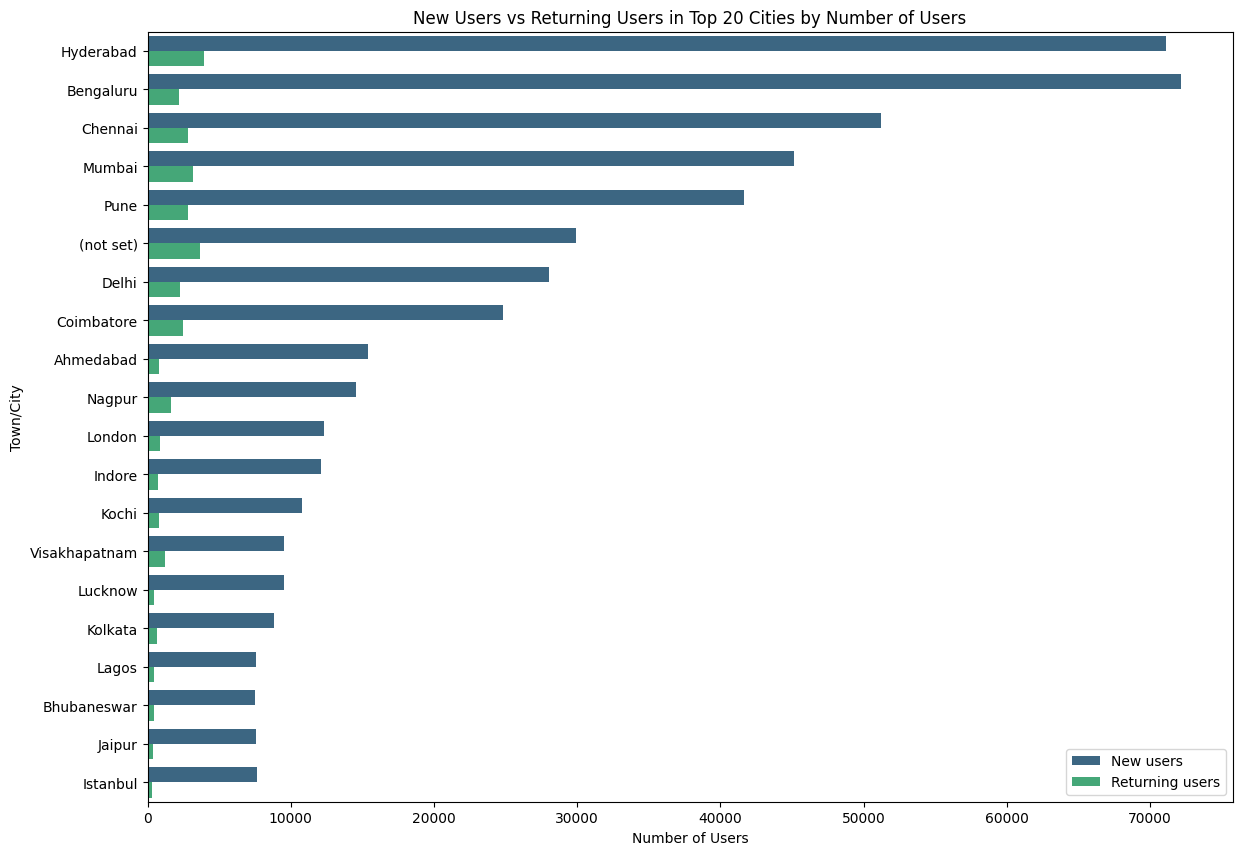

In [ ]:
top_cities['Returning users'] = top_cities['Users'] - top_cities['New users']

top_cities_melted = top_cities.melt(id_vars='Town/City', value_vars=['New users', 'Returning users'],
                                    var_name='User Type', value_name='Count')

plt.figure(figsize=(14, 10))
sns.barplot(y='Town/City', x='Count', hue='User Type', data=top_cities_melted, palette='viridis')
plt.xlabel('Number of Users')
plt.ylabel('Town/City')
plt.title('New Users vs Returning Users in Top 20 Cities by Number of Users')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

# Bubble chart
fig = px.scatter(top_cities, x='New users', y='Users', size='Returning users', color='Town/City',
                 hover_name='Town/City', title="Town/City Size by Users")

fig.show()

The data reveals that the majority of users in most cities are new users, with Hyderabad, Bengaluru, and Chennai having the highest counts. This suggests that these cities are experiencing significant growth in attracting first-time visitors. Conversely, the proportion of returning users is much smaller across all cities, indicating a potential area for improving user retention strategies.

<ipython-input-15-5df7a9eefeca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities['Town/City'], x=top_cities['Event count'], palette='magma')


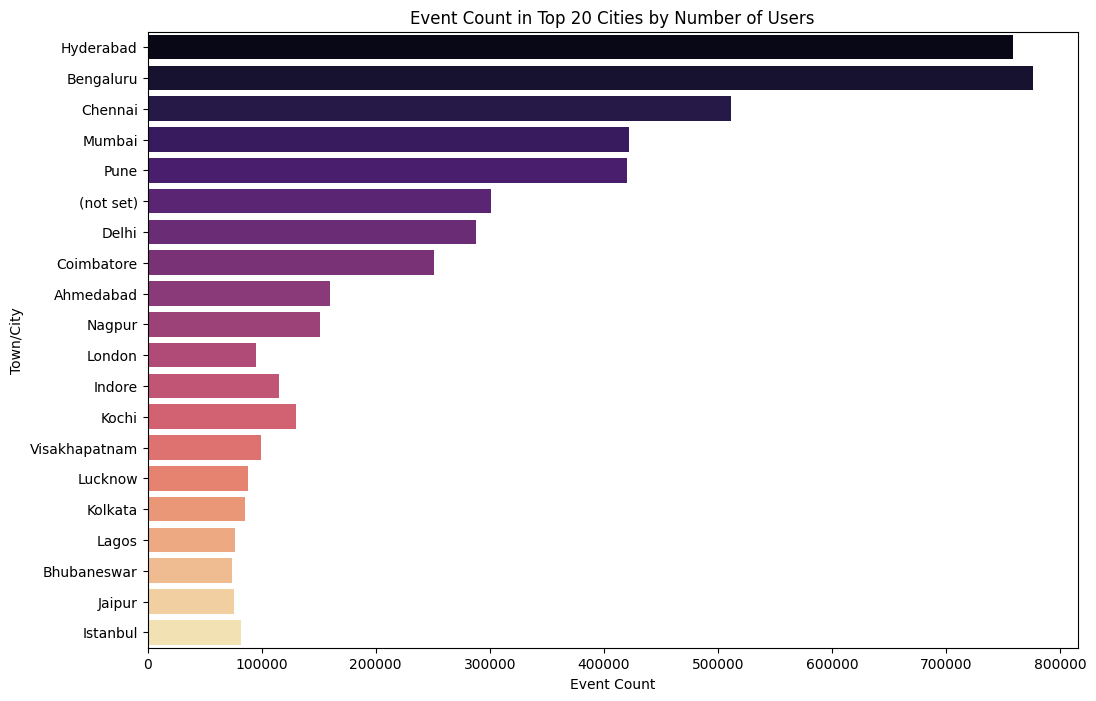

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Event count'], palette='magma')
plt.xlabel('Event Count')
plt.ylabel('Town/City')
plt.title('Event Count in Top 20 Cities by Number of Users')
plt.show()

Hyderabad and Bengaluru lead significantly with the highest event counts, indicating a high level of user interactions in these cities. Chennai and Mumbai also exhibit substantial event counts, demonstrating active user engagement. The cities towards the lower end of the chart, such as Bhubaneswar, Jaipur, and Istanbul, have relatively lower event counts, suggesting less user interaction.

To segment users effectively for targeting ads and maximizing the ad budget, we need to identify user segments that offer the highest potential for engagement and conversions. Given the dataset, we can segment users based on the following criteria:<br>

* **User Activity**: High vs. low activity based on engaged sessions and average engagement time.
* **User Type**: New vs. returning users.
* **Geographic Location**: Cities with high, medium, and low user counts.

In [ ]:
# high-Engagement Users
high_engagement_users = data[(data['Engaged sessions per user'] > data['Engaged sessions per user'].mean()) &
                             (data['Average engagement time'] > data['Average engagement time'].mean())]

# new Users
new_users = data[data['New users'] > (0.5 * data['Users'])]

# returning Users
returning_users = data[data['Users'] - data['New users'] > (0.5 * data['Users'])]

# categorize cities into high, medium, and low user count segments based on quantiles
user_quantiles = data['Users'].quantile([0.33, 0.67])
low_user_cities = data[data['Users'] <= user_quantiles[0.33]]
medium_user_cities = data[(data['Users'] > user_quantiles[0.33]) & (data['Users'] <= user_quantiles[0.67])]
high_user_cities = data[data['Users'] > user_quantiles[0.67]]

# summary of segments
segments_summary = {
    "High Engagement Users": len(high_engagement_users),
    "New Users": len(new_users),
    "Returning Users": len(returning_users),
    "Low User Cities": len(low_user_cities),
    "Medium User Cities": len(medium_user_cities),
    "High User Cities": len(high_user_cities)
}

segments_summary

{'High Engagement Users': 1383,
 'New Users': 4975,
 'Returning Users': 17,
 'Low User Cities': 1687,
 'Medium User Cities': 1676,
 'High User Cities': 1637}

To effectively allocate the budget using these user segments, we should focus on strategies that maximize returns by targeting specific groups. Here’s how we can approach budget allocation based on each segment:

* **High Engagement Users**: These users are already highly engaged, meaning they have a high likelihood of converting or purchasing. We can use a substantial portion of the budget for this segment to maintain and enhance their engagement. We can offer personalized ads, loyalty programs, and exclusive offers to this segment.
* **New Users**: These users represent potential growth. Effective onboarding can turn them into regular, engaged users. We can invest in welcoming campaigns, introductory offers, and onboarding programs for this segment. The focus should be on making their first experiences positive to drive retention.
* **Returning Users**: While the number of returning users is small, they represent loyalty and consistency. We can offer retention strategies, such as personalized recommendations and rewards for continued use to this segment of users.
* **Low User Cities**: These cities have untapped potential. Awareness campaigns can increase the user base. We can allocate a smaller portion of the budget to brand awareness campaigns and introductory offers to attract new users from these cities.
* **Medium User Cities**: These cities show moderate potential and can be nurtured to become high-user cities. We can allocate more budget to this segment in the form of targeted ads to convert them into cities with high users.
* **High User Cities**: These cities already have a large user base with high engagement potential. Similar to the high-engagement users, we can use a substantial portion of the budget for this segment as well to maintain and enhance their engagement.